# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀察去除離群值的影響

# [教學目標]
- 以下用房價預測資料, 觀察去除離群值的影響

# [範例重點]
- 觀察原始數值的散佈圖, 以及線性迴歸分數 (In[5], Out[5]) 
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = '../data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
    # log1p = log（x+1）, 對'SalePrice'欄位做log1p
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):    
    # zip把iterable打包zip object, 可用list轉換成tuple pair
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
    # instancelization 
    # MinMaxScaler(最小最大值標準化)，見下方說明
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


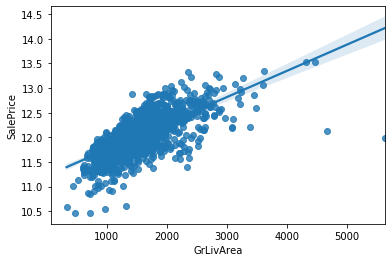

0.8499756324675516

In [4]:
# 顯示 GrLivArea 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['GrLivArea'], y=train_Y)
    # 對'GrLivArea'與 y=np.log1p(df_train['SalePrice']) 作迴歸圖
plt.show()


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
    # 用MMEncoder對df 做nomalization
estimator = LinearRegression()
    # from sklearn.linear_model import LinearRegression
cross_val_score(estimator, train_X, train_Y, cv=5).mean()
    # 見下方
    # Evaluate a score by cross-validation
    # 以normalization 後的df和 做完log1p的SalePrice'，分成5分的方式做cross validation, 以linear regression為estimator
    # 做完5次取平均=0.8466510874327978

# 調整outlier: 把outlier改為設定的值

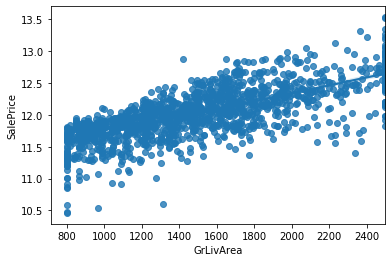

0.8590286613713278

In [5]:
# 將 GrLivArea 限制在 800 到 2500 以內, 調整離群值
import matplotlib.pyplot as plt
df['GrLivArea'] = df['GrLivArea'].clip(800, 2500)
    # Trim(修剪) values at input threshold(s).
    # 可以使用此函數為數據單元格中任何單元格可以具有的值設置下限和上限。
sns.regplot(x = df['GrLivArea'], y=train_Y)
    # 畫出修剪完後的迴歸圖
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()
    # 0.8590286613713278

# 直接刪除outlier

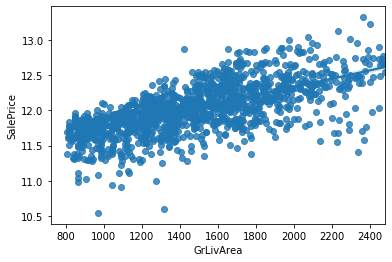

0.8765064877034943

In [6]:
# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

## sklearn.preprocessing.MinMaxScaler
    class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
$$   X_{scaled}=\dfrac{(X-X.min(axis=0))}{X.max(axis=0)-X.min(axis=0)}*(max-min)+min $$
  
    作用：Transform features by scaling each feature to a given range.([0,1] by default)
    
ref: https://kknews.cc/zh-tw/code/3a549r8.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
    # 實例化
print(scaler.fit(data))
    # fit，在這裡本質是生成min(x)和max(x)

In [ ]:
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.data_range_)
    # Per feature range ``(data_max_ - data_min_)`` seen in the data


In [ ]:
print(scaler.transform(data))
    # Scale features of X according to feature_range.

In [ ]:
# another option, 可得到相同結果
print(scaler.fit_transform(data))


## Seaborn.regplot
https://seaborn.pydata.org/generated/seaborn.regplot.html

    Plot data and a linear regression model fit.

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
tips

In [ ]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)
    # 以total_bill和tip 2個欄位來作圖，regplot會畫出迴歸

In [ ]:
import pandas as pd

mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
    # 產生一個以mean=(4,6), cov=[(1.5, .7), (.7, 1)]的normal distribution來sample x,y
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
ax = sns.regplot(x=x, y=y, marker="+")

## cross_val_score()
Evaluate a score by cross-validation

    sklearn.model_selection.cross_val_score(estimator, X, y,cv=int )

### Parameters:
####    。estimator: 
    estimator object implementing ‘fit’, The object to use to fit the data.
####    。X: 
    array-like，The data to fit. Can be for example a list, or an array.
####    。y:
    array-like, optional, default: None, The target variable to try to predict in the case of supervised learning.
####    。cv: 
    int, cross-validation generator or an iterable, optional, Determines the cross-validation splitting strategy. 
    


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

import pandas as pd
diabetes = datasets.load_diabetes()
print(type(diabetes))
diabetes

In [ ]:
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
    # Lasso算法（英語：least absolute shrinkage and selection operator，又譯最小絕對值收斂和選擇算子、套索算法）
    # https://zh.wikipedia.org/wiki/Lasso%E7%AE%97%E6%B3%95
print(cross_val_score(lasso, X, y, cv=3))
    # 對data及target分別取150項，以lasso做estimator, 分成3分來做cross validation
    # 因此可得到3個分數[0.33150734, 0.08022311, 0.03531764]